In [1]:
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap, BoundaryNorm

import csv
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.colors as colors
import argparse

In [2]:
df = pd.read_csv("ATSC.csv") 
df.head(n=5)  # visualize the data
n_feature = df.shape[1] #Number of input columns
sample = df.shape[0] #Number of input rows
sample = df.drop(['type'], axis=1) ## delete vertical axis when axis = 1, delete horizontal axis when 0
max_speed = df[['speed']].max()
time = np.array(df[['time']])
pos = np.array(df[['relative_position']])
speed = np.array(df[['speed']])
sample = sample.to_numpy()

In [3]:
# some plotting parameters
cdict = {
        'red': ((0, 0, 0), (0.2, 1, 1), (0.6, 1, 1), (1, 0, 0)),
        'green': ((0, 0, 0), (0.2, 0, 0), (0.6, 1, 1), (1, 1, 1)),
        'blue': ((0, 0, 0), (0.2, 0, 0), (0.6, 0, 0), (1, 0, 0))
    }
my_cmap = colors.LinearSegmentedColormap('my_colormap', cdict, 1024)

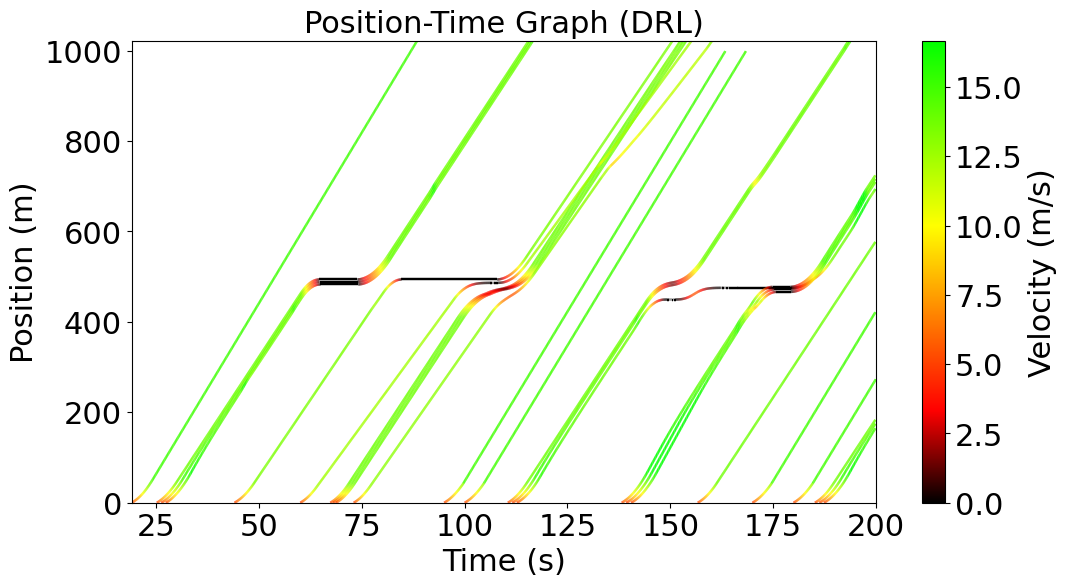

In [4]:
# perform plotting operation
fig = plt.figure(figsize=(12, 6))
ax = plt.axes()
ax.set_xlim(min(time), max(time))
ax.set_ylim(min(pos), max(pos))
norm = plt.Normalize(0, max_speed)
cols = []

for i in range(pos.shape[1]):
    unique_car_pos = pos[:, i]
    disc = np.where(np.abs(np.diff(unique_car_pos)) >= 10)[0] + 1
    unique_car_time = np.insert(time[:, i], disc, np.nan)
    unique_car_pos = np.insert(unique_car_pos, disc, np.nan)
    unique_car_speed = np.insert(speed[:, i], disc, np.nan)

    points = np.array(
            [unique_car_time, unique_car_pos]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap=my_cmap, norm=norm)

    # Set the values used for color mapping
    lc.set_array(unique_car_speed)
    lc.set_linewidth(1.75)
    cols.append(lc)

plt.title('Position-Time Graph (ATSC)', fontsize=22)
plt.ylabel('Position (m)', fontsize=22)
plt.xlabel('Time (s)', fontsize=22)


for col in cols:
  line = ax.add_collection(col)

cbar = plt.colorbar(line, ax=ax)
cbar.set_label('Velocity (m/s)', fontsize=22)
cbar.ax.tick_params(labelsize=22)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.show()    